# Jacobi: error propagation made easy

**Hans Dembinski** | TU Dortmund

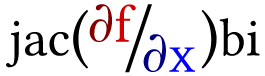

**PyPI** https://pypi.org/project/jacobi

**Source** https://github.com/HDembinski/jacobi

**Documentation** https://hdembinski.github.io/jacobi

**Latest release** v0.3.0

## Error propagation

* 1D
$$
y = f(x) \qquad \longrightarrow \qquad \sigma_y = |f'(x)| \, \sigma_x
$$

* 2D
$$
\vec y = f(\vec x) \qquad \longrightarrow \qquad C_y = J \, C_x \, J^T
$$
with
$$
J_{ik} = \frac{\partial y_i}{\partial x_k}
$$

## Computing first derivatives

* Analytically by hand

* Analytically with computer algebra system: e.g. [Sympy](https://docs.sympy.org/latest/modules/matrices/matrices.html?highlight=jacobian#sympy.matrices.matrices.MatrixCalculus.jacobian)

* Automatic differentiation (AD): e.g. [Tensorflow](https://www.tensorflow.org/guide/autodiff), [JAX](https://jax.readthedocs.io/en/latest/jax.html?highlight=jacobian#automatic-differentiation), [numdifftools](https://numdifftools.readthedocs.io/en/stable/reference/numdifftools_summary.html#numdifftools-nd-algopy-module), [uncertainties](https://pythonhosted.org/uncertainties/user_guide.html#derivatives)

* Numerical differentiation: **Jacobi** or e.g. [numdifftools](https://numdifftools.readthedocs.io/en/stable/index.html)

## John D'Errico's DERIVEST algorithm

* Jacobi is a rewrite from scratch of [DERIVEST algorithm from Matlab](https://de.mathworks.com/matlabcentral/fileexchange/13490-adaptive-robust-numerical-differentiation)
* Evaluate first (forward/backward) or second order (central) finite-difference approximation 
$$
f'(x) = \frac{f(x + h) - f(x)}{h} + O(h^2)
$$
* Start with large $h$, compute derivative, reduce $h$, and repeat
* Fit polynomial to derivative estimates obtained at various step sizes $h_0$, $h_1$, ..., and extrapolate to $h = 0$
* Stop when accuracy does not improve or machine precision is reached


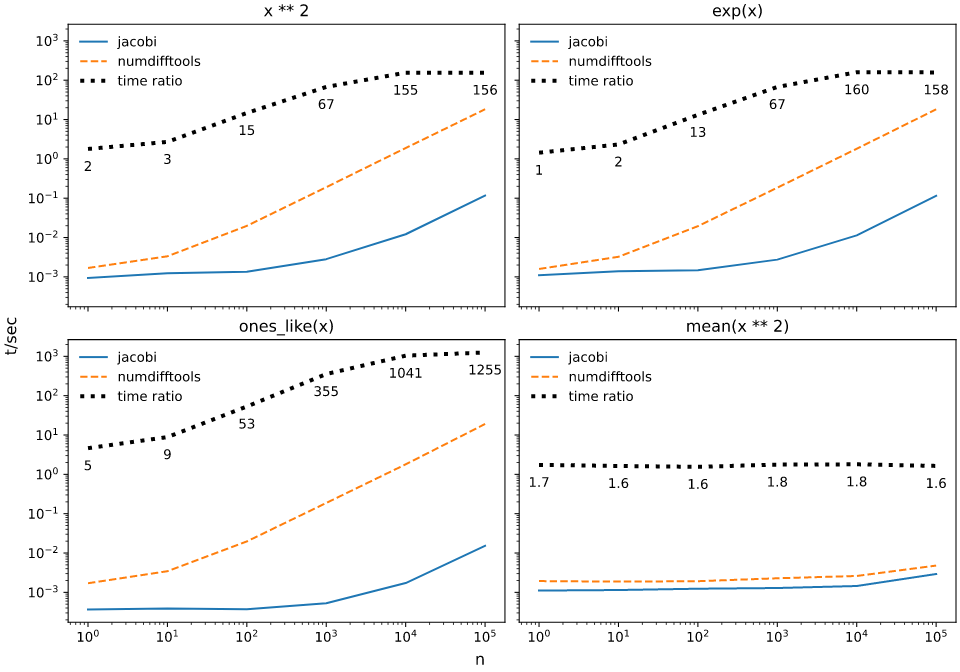

## Example 1

* Supported general case: functions that map $\mathbb{R} ^K$ to $\mathbb R^M$  with M != K

In [15]:
from jacobi import propagate

def fn(x):
    return x ** 2 + 1

x = [1, 2]
xcov = [[3, 1],
        [1, 4]]

y, ycov = propagate(fn, x, xcov)
y, ycov

(array([2, 5]),
 array([[12.,  8.],
        [ 8., 64.]]))

## Example 2

* Supported common special case: functions of multiple independent arguments

In [30]:
def fn(x, y):
    return x + y

x = 1
y = 2
xcov = 2
ycov = 3

z, zcov = propagate(fn, x, xcov, y, ycov)
z, zcov

(array([3]), array([[5.]]))

## Summary

* Numerical differentiation with **Jacobi**
    * ✓ Compute derivative of any Python function
    * ✓ Works with any (at all differentiable) Python function
    * ✓ **Not intrusive** (AD libraries are intrusive)
    * ✓ **No problem with calls into foreign libraries**
    * ✖️ May be slower than other solutions
* Jacobi is faster than numdifftools and **numerically robust**
* `jacobi.propagate` uses this to do automatic error propagation

## Outlook

* Compute Hessian matrix with same algorithm
